<a href="https://colab.research.google.com/github/leonardo3108/robustez-query/blob/main/code/gerar_graficos_comparacao_metodos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget -nc https://raw.githubusercontent.com/leonardo3108/robustez-query/main/data/ndcg10_originals.csv

--2021-11-11 00:11:48--  https://raw.githubusercontent.com/leonardo3108/robustez-query/main/data/ndcg10_originals.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5433 (5.3K) [text/plain]
Saving to: ‘ndcg10_originals.csv’

ndcg10_originals.cs 100%[===================>]   5.31K  --.-KB/s    in 0s      

2021-11-11 00:11:48 (73.0 MB/s) - ‘ndcg10_originals.csv’ saved [5433/5433]



In [2]:
import pandas as pd
import csv

df_nDCG = pd.read_csv('ndcg10_originals.csv')
df_nDCG

,Query#,BM25_nDCG@10,Rerank_nDCG@10,Dense_nDCG@10,Text
0,23849,0.009089,0.524757,0.720980,are naturalization records public information
1,42255,0.794655,0.909684,0.719978,average salary for dental hygienist in nebraska
2,47210,0.636973,0.949967,0.820811,average wedding dress alteration cost
3,67316,0.260714,0.646910,0.029389,can fever cause miscarriage early pregnancy
4,118440,0.138862,0.278481,0.154583,define bmt medical
5,121171,0.370976,0.451428,0.606634,define etruscans
6,135802,0.977854,0.754671,0.643936,definition of laudable
7,141630,0.321125,0.618486,0.255310,describe how muscles and bones work together t...
8,156498,0.309856,0.720378,0.052677,do google docs auto save
9,169208,0.270242,0.411146,0.305617,does mississippi have an income tax


In [6]:
import numpy

In [31]:
# teste de ordenação

import numpy as np
import matplotlib.pyplot as plt


data = df_nDCG.to_dict(orient='index')
for i, query in enumerate(sorted(data.keys(), reverse=True)):
  print(data[query]['BM25_nDCG@10'],data[query]['Rerank_nDCG@10'],data[query]['Dense_nDCG@10'])
  valores = numpy.array([data[query]['BM25_nDCG@10'],data[query]['Rerank_nDCG@10'],data[query]['Dense_nDCG@10']])
  print(valores)
  ordem = (-valores).argsort()
  print('ordem', ordem)
  if i > 2: break 

print(len(ordem))

0.7558735418167734 0.7484665528021941 1.0000000000000002
[0.75587354 0.74846655 1.        ]
ordem [2 0 1]
0.4470930543717491 0.5834596422420435 0.394490931959444
[0.44709305 0.58345964 0.39449093]
ordem [1 0 2]
0.4269692648037663 0.6816686032036532 0.2214797497298329
[0.42696926 0.6816686  0.22147975]
ordem [1 0 2]
0.3609519008339534 0.490067846501924 0.5728663051592666
[0.3609519  0.49006785 0.57286631]
ordem [2 1 0]
3


In [48]:
x = 'BM25_nDCG@10'
x.split('_')[0]

'BM25'

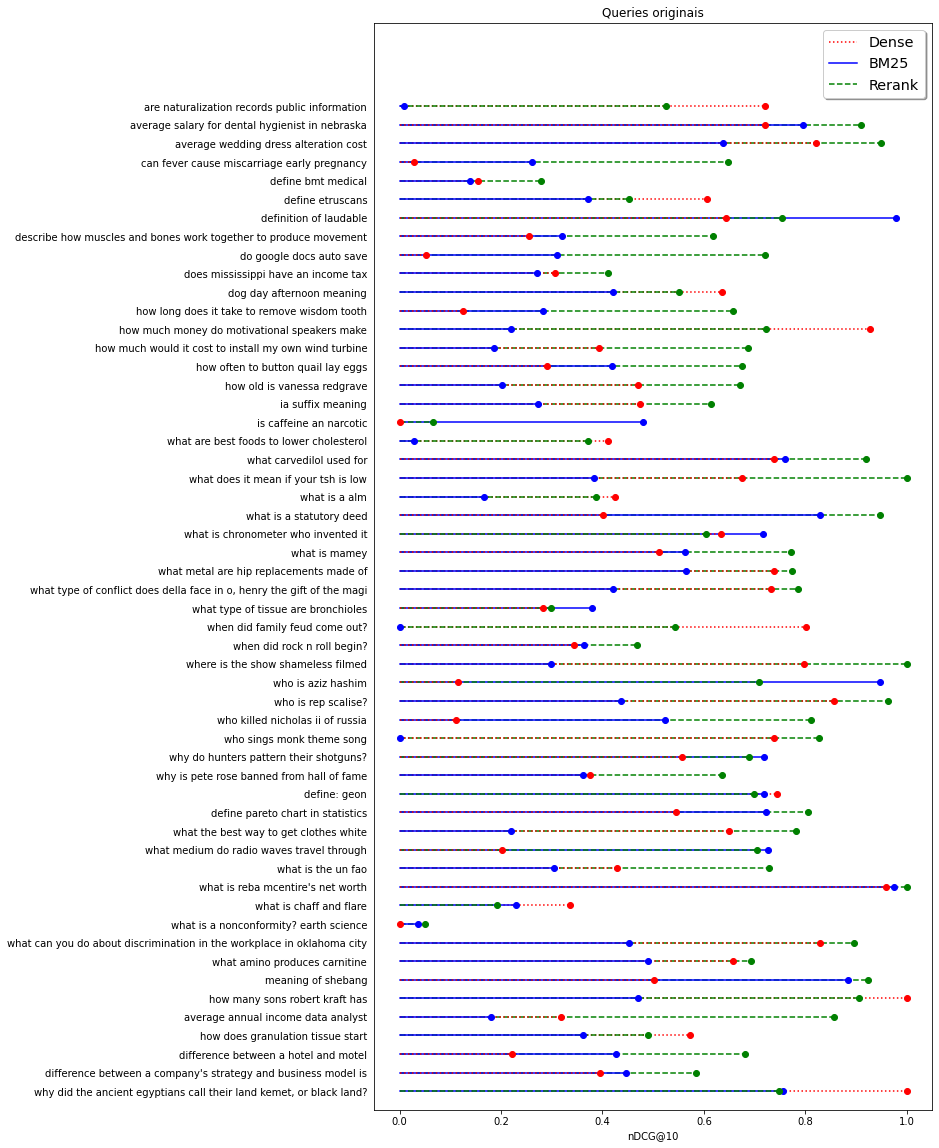

In [49]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 20))
ax = fig.subplots()
data = df_nDCG.to_dict(orient='index')

Y = np.zeros(10)
yticklabels = []

def plot_query(x, y, linestyle, dotstyle, color, label):
    if y:
        label = None
    ax.plot(np.linspace(0, x, 10), Y+i, linestyle=linestyle, linewidth=1.5, color=color, label=label)
    ax.plot(x, y, dotstyle)

metodos = ['BM25_nDCG@10','Rerank_nDCG@10','Dense_nDCG@10']
formato = ['solid', 'dashed', 'dotted']
cores = ['blue', 'green', 'red']
marcas = ['bo', 'go', 'ro']

for i, query in enumerate(sorted(data.keys(), reverse=True)):

  valores = numpy.array([data[query]['BM25_nDCG@10'],data[query]['Rerank_nDCG@10'],data[query]['Dense_nDCG@10']])
  #print(valores)
  ordem = (-valores).argsort()

  nDCG_BM25 = data[query]['BM25_nDCG@10']
  nDCG_rerank = data[query]['Rerank_nDCG@10']
  nDCG_dense = data[query]['Dense_nDCG@10']

  for pos in range(len(ordem)):
    prox_pos = ordem[pos]
    plot_query(data[query][metodos[prox_pos]], i, formato[prox_pos], marcas[prox_pos], cores[prox_pos], metodos[prox_pos].split('_')[0])

  yticklabels.append(data[query]['Text'])

#médias:
#ax.plot(np.zeros(10) + 100 * df_nDCG['BM25_nDCG@10'].mean(), np.linspace(-0.5, len(data), 10), linestyle='solid', linewidth=.5, color='blue')
#ax.plot(np.zeros(10) + 100 * df_nDCG['Rerank_nDCG@10'].mean(), np.linspace(-0.5, len(data), 10), linestyle='dashed', linewidth=.5, color='green')
#dotted, dashdot

legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')
ax.set_title('Queries originais')
ax.set(ylim=(-1, len(data)+3.5),
        yticks=np.arange(len(data)), 
        xticks=np.arange(0, 1.10, .20),
        yticklabels=yticklabels)
ax.set_xlabel('nDCG@10')
ax.tick_params(left=False, bottom=True, labelbottom=True)
fig.savefig('ndcg10_originals.png', transparent=False, dpi=80, bbox_inches='tight')

In [40]:
df_nDCG[['BM25_nDCG@10', 'Rerank_nDCG@10', 'Dense_nDCG@10']].describe()

,BM25_nDCG@10,Rerank_nDCG@10,Dense_nDCG@10
count,54.000000,54.000000,54.000000
mean,0.433924,0.669499,0.504109
std,0.260458,0.226781,0.272433
min,0.000000,0.050171,0.000000
25%,0.263096,0.559207,0.308539
50%,0.400750,0.695759,0.505919
75%,0.618874,0.809561,0.728801
max,0.977854,1.000000,1.000000


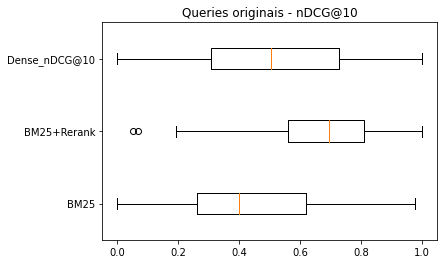

In [44]:
fig, ax = plt.subplots()
ax.set_title('Queries originais - nDCG@10')
ax.boxplot(df_nDCG[['BM25_nDCG@10', 'Rerank_nDCG@10', 'Dense_nDCG@10']].values, vert=False)
ax.set(yticklabels=['BM25', 'BM25+Rerank', 'Dense_nDCG@10'])
fig.show()
fig.savefig('ndcg10_originals_boxplot.png', transparent=False, dpi=80, bbox_inches='tight')

In [45]:
df_nDCG[['BM25_nDCG@10', 'Rerank_nDCG@10', 'Dense_nDCG@10']].mean().to_dict()

{'BM25_nDCG@10': 0.43392410335214104,
 'Dense_nDCG@10': 0.5041086119242376,
 'Rerank_nDCG@10': 0.6694991217000813}

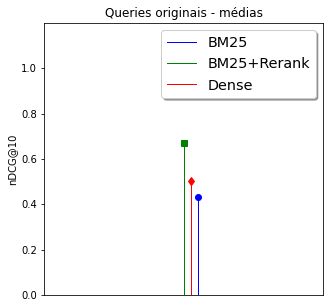

In [54]:
fig, ax = plt.subplots(figsize=(5, 5))
data = df_nDCG[['BM25_nDCG@10', 'Rerank_nDCG@10', 'Dense_nDCG@10']].mean().to_dict()

ax.plot(np.zeros(10)+2, np.linspace(0, data['BM25_nDCG@10'], 10), linestyle='solid', linewidth=1, color='blue', label='BM25')
ax.plot(np.zeros(10), np.linspace(0, data['Rerank_nDCG@10'], 10), linestyle='solid', linewidth=1, color='green', label='BM25+Rerank')
ax.plot(np.zeros(10)+1, np.linspace(0, data['Dense_nDCG@10'], 10), linestyle='solid', linewidth=1, color='red', label='Dense')

ax.plot(2, data['BM25_nDCG@10'], 'bo')
ax.plot(0, data['Rerank_nDCG@10'], 'gs')
ax.plot(1, data['Dense_nDCG@10'], 'rd')

legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')
ax.set_title('Queries originais - médias')
ax.set(ylim=(0, 1.2), xlim=(-20, 20),
        yticks=np.arange(0, 1.1, .2))
ax.set_ylabel('nDCG@10')
ax.tick_params(left=True, bottom=False, labelbottom=False)
fig.savefig('ndcg10_originals_means.png', transparent=False, dpi=80, bbox_inches='tight')
plt.show()

In [55]:
from google.colab import files

files.download( "ndcg10_originals_means.png" ) 
files.download( "ndcg10_originals_boxplot.png" ) 
files.download( "ndcg10_originals.png" ) 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>